# Overview

Film industry is big. And some films have big box offices, such as Avatar. Some films may not seems big but with small investment, yielded significant profits comparing to investment, like The Gallows. There are many factors can affect investment outcomes, such as politics, time of year, economy. More in films themselfs, there are *factors* like **Budget, Director/Actor, Genre**. 

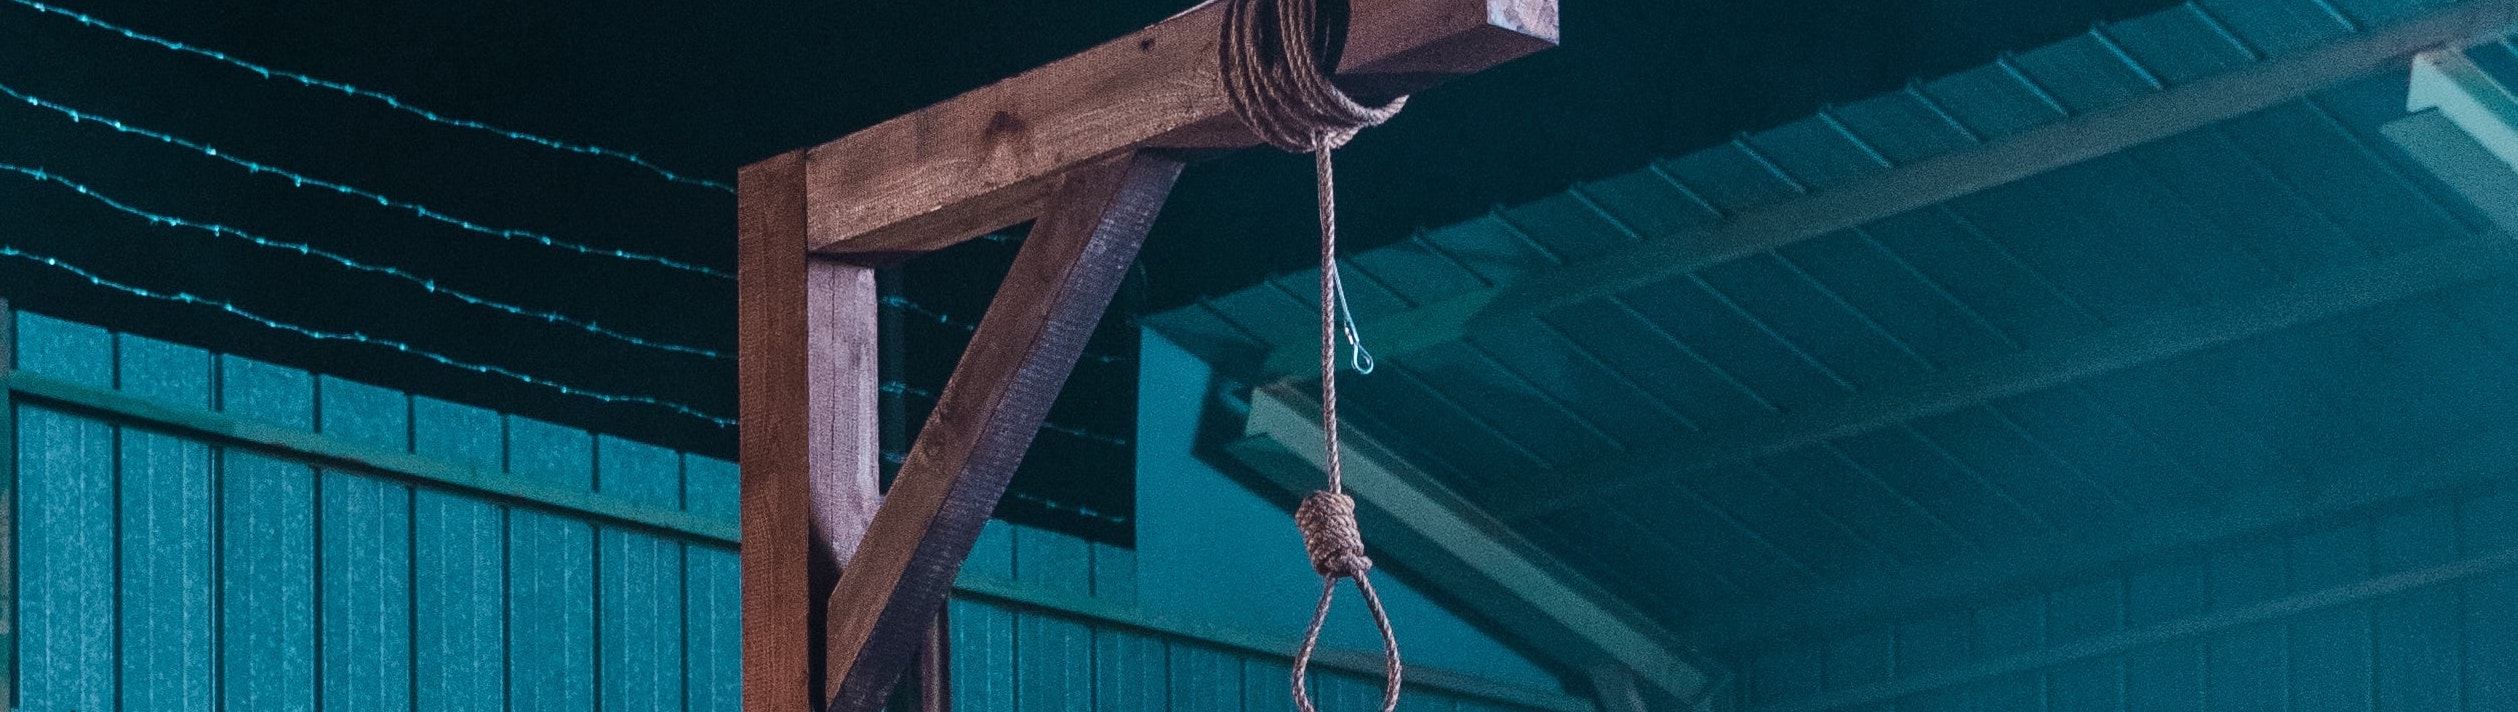

from upsplash.com

# Business Understanding

Microsoft wants to invest in film industry. Here I use **Return on Investment**(or ROI) as measurment to determine if the film is worth to invest. **Budget, Director/Actor, Genre** were investigated here to see how different value of them can affect ROI. At end of the project, recommendations are provided on how to choose between these 3 selections in order to yield high **ROI**. However, these recommendations are just recommendations, final decisions have to be made based on real situation. 

# Data Understanding

There are 5 *csv files*(including tsv files) and 1 *sqlite database*. 

*movie_budgets.csv* contains information about **budgets** and **worldwide_gross**, which were used to calculate **ROI**. 

In sqlite3 database, there are four tables *movie_basics*,*movie_akas*,*persons*,*principals*. These tables contains information about directors, actors, actresses, including their name. Also movie titles have primary titles, original title and aka titles, which are used to connected to *movie_budgets.csv*, so we can get the ROI for each **category(directors, actors, actresses)**. At mean time, we also can get the ROI for each **genres**.  

# Data Preparation

## Table previews

Table **previews** are showned below to give a brief peep into datas that will be worked on.

In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [621]:
df_tmdb =pd.read_csv('./Data/tmdb.movies.csv')
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [622]:
df_rt_reviews= pd.read_csv('./data/rt.reviews.tsv',sep='\t', encoding = "cp1252")
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [623]:
df_rt_movie_info = pd.read_csv('./data/rt.movie_info.tsv', sep='\t', encoding = "cp1252")
df_rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [624]:
df_tn_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv')
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


This table is only table that contain infomation on **budget**, which is used to calculate **ROI**.

In [625]:
df_bom_movie_gross = pd.read_csv('./data/bom.movie_gross.csv')
df_bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


This table contains less records of **gross** and doesn't contain **budget** info.

In [626]:
conn = sqlite3.connect('./data/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [627]:
def sql_q1(table_name):
    q = f"""
    SELECT * 
    FROM {table_name};"""
    return q

df_movie_basics = pd.read_sql(sql_q1('movie_basics'),conn)

In [628]:

df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


This table contains **primary_title, original_title** and **genres**.

In [629]:
df_directors = pd.read_sql(sql_q1('directors'),conn)

In [630]:
df_known_for = pd.read_sql(sql_q1('known_for'),conn)

In [631]:
df_movie_akas = pd.read_sql(sql_q1('movie_akas'),conn)
df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


This table contains more **title**.

In [632]:
df_movie_ratings = pd.read_sql(sql_q1('movie_ratings'),conn)

In [633]:
df_persons = pd.read_sql(sql_q1('persons'),conn)
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


This table contains **person** name.

In [634]:
df_principals = pd.read_sql(sql_q1('principals'),conn)
df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


This table contains **category**. It also contain movie_id and person_id, which can be used as **keys** to connect other tables. 

In [635]:
df_writers = pd.read_sql(sql_q1('writers'),conn)

In [636]:
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [637]:
df_principals.movie_id.value_counts()

tt5256098    10
tt5625434    10
tt3754976    10
tt1729218    10
tt4198034    10
             ..
tt5939412     1
tt8302894     1
tt2962902     1
tt5790502     1
tt7014590     1
Name: movie_id, Length: 143454, dtype: int64

##  EDA

### Budgets

In [638]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [639]:
!ls

Notebook.ipynb      code                images
Notebook_copy.ipynb data                readme.md


In [640]:
# trying to import module but failed. 
import sys
sys.path.insert(0,'./code')

import data_preparation as dp



In [641]:
# formate currency from str '$4,000' to int '4000'
df_tn_movie_budgets['production_budget'] = df_tn_movie_budgets.production_budget.apply(lambda x: int(x.replace('$','').replace(',','')))

In [642]:
# formate currency from str '$4,000' to int '4000'
df_tn_movie_budgets['domestic_gross'] = df_tn_movie_budgets.domestic_gross.apply(lambda x: int(x.replace('$','').replace(',','')))

In [643]:
# formate currency from str '$4,000' to int '4000'
df_tn_movie_budgets['worldwide_gross'] = df_tn_movie_budgets.worldwide_gross.apply(lambda x: int(x.replace('$','').replace(',','')))

In [644]:
# insanity check
df_tn_movie_budgets['production_budget'][1]

410600000

In [645]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [646]:
# add column ROI 
df_tn_movie_budgets['ROI'] = (df_tn_movie_budgets['worldwide_gross'] - df_tn_movie_budgets['production_budget']*2)/df_tn_movie_budgets['production_budget']

In [647]:
# insanity check
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,4.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-1.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-2.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,38.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-1.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-2.000000


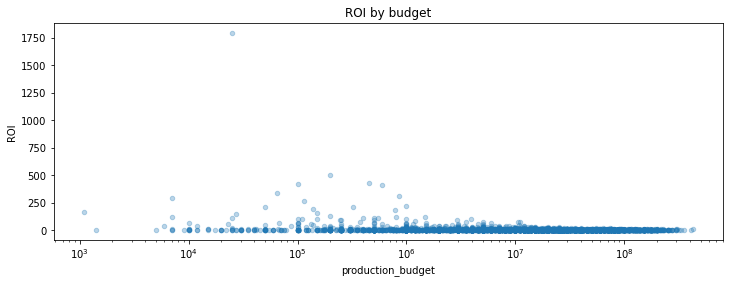

In [648]:
# use scatter plot to visulize the relationship between ROI and budget
df_tn_movie_budgets.plot(kind='scatter', x='production_budget',y='ROI',logx=True, title='ROI by budget',alpha=.3,figsize=(12,4));

In [649]:
# sort by ROI
df_tn_movie_budgets = df_tn_movie_budgets.sort_values(by='ROI',ascending=False)

There is a outlier, it's 'Deep Throat', which has 1750 as return on investment. 

To continue analysis, let's delete it.


In [650]:
df_tn_movie_budgets.reset_index(inplace=True)

In [651]:
# drop outlier
df_tn_movie_budgets.drop(0,inplace=True)

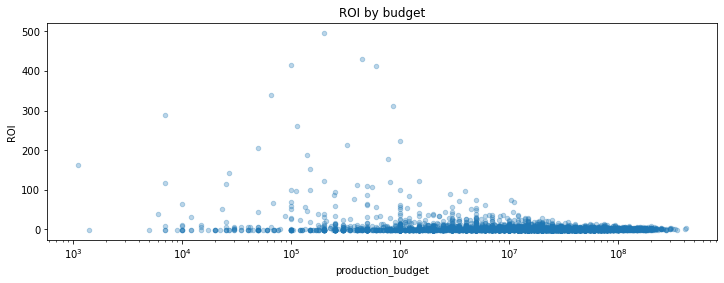

In [678]:
df_tn_movie_budgets.plot(kind='scatter', x='production_budget',y='ROI',logx=True, title='ROI by budget',alpha=.3,figsize=(12,4));
plt.savefig('ROI_by_budget')

1. Most films have ROI below 50. 

2. When **budget** is *between* 10K to 1M, films have *higher* chance to achieve higher ROI, especially when budget are *between* 100K to 1M.

3. There are many films that has **budget** *between* 1M to 10M, but they can't achieve ROI more than 100. Then budgets *higher* than 10M lead to *much lower* ROI overall.

4. There are few films that has **budget** *between* 1K to 10K, but ROI in this **budget** range can be very high or low, means having big variance. 

My **recommendation** is to have **budget** set *between* 100K to 200K to have better chance to have high return on investment. 

### Director/Actor

In [653]:
# recall what related tables look like 
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [654]:
# recall what related tables look like 
df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [655]:
# merge movie_basics, persons, movie_akas to get tables that contains category and titles.
df_director_actor = df_principals.merge(df_movie_basics,on='movie_id').merge(df_persons,on='person_id').merge(df_movie_akas,on='movie_id',how='left')
df_director_actor

,movie_id,ordering_x,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,ordering_y,title,region,language,types,attributes,is_original_title
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",A Thin Life,A Thin Life,2018,75.0,Comedy,Tommy Dysart,NaN,NaN,actor,1.0,A Thin Life,AU,None,None,None,0.0
1,tt0111414,2,nm0398271,director,None,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Frank Howson,1952.0,NaN,"actor,writer,producer",1.0,A Thin Life,AU,None,None,None,0.0
2,tt5573596,5,nm0398271,director,None,None,Remembering Nigel,Remembering Nigel,2015,NaN,Comedy,Frank Howson,1952.0,NaN,"actor,writer,producer",1.0,Remembering Nigel,AU,None,None,None,0.0
3,tt0111414,3,nm3739909,producer,producer,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Barry Porter-Robinson,NaN,NaN,"producer,art_department",1.0,A Thin Life,AU,None,None,None,0.0
4,tt0323808,10,nm0059247,editor,None,None,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",1.0,May Day,GB,None,working,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972478,tt9692684,4,nm6009913,writer,writer,None,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Sabrina Mahfouz,NaN,NaN,writer,2.0,Disnatured,GB,None,None,None,0.0
2972479,tt9692684,4,nm6009913,writer,writer,None,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Sabrina Mahfouz,NaN,NaN,writer,3.0,A Christmas Carol,None,None,None,new title,0.0
2972480,tt9692684,5,nm10441595,producer,producer,None,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Simmer Dim,NaN,NaN,producer,1.0,Disnatured,None,None,original,None,1.0
2972481,tt9692684,5,nm10441595,producer,producer,None,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Simmer Dim,NaN,NaN,producer,2.0,Disnatured,GB,None,None,None,0.0


In [656]:
df_tn_movie_budgets

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
1,5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,496.750000
2,5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,429.517853
3,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.564740
4,5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,411.833333
5,5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,340.058585
...,...,...,...,...,...,...,...,...
5777,5522,23,"Dec 31, 2014",Pancakes,400000,0,0,-2.000000
5778,5521,22,"Nov 4, 2005",Show Me,400000,0,0,-2.000000
5779,5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000,0,0,-2.000000
5780,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.000000


In [657]:
# merge direct_actor and movie_budgets to get table using primary_title
df_on_primary_title_ROI = df_tn_movie_budgets.merge(df_director_actor, left_on='movie', right_on='primary_title')

In [658]:
df_on_primary_title_ROI

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,ordering_x,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,ordering_y,title,region,language,types,attributes,is_original_title
0,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",10.0,Daragaci,TR,tr,imdbDisplay,None,0.0
1,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",11.0,La Horca,CL,None,imdbDisplay,None,0.0
2,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",12.0,The Gallows,US,None,None,None,0.0
3,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",13.0,La potence,CA,fr,imdbDisplay,None,0.0
4,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",14.0,Stage Fright,None,None,working,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457179,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,5,nm10075778,director,None,None,Checkmate,Checkmate,2018,NaN,Drama,Dana Campbell,NaN,NaN,"director,writer",NaN,NaN,NaN,NaN,NaN,NaN,NaN
457180,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,6,nm3569579,writer,None,None,Checkmate,Checkmate,2018,NaN,Drama,Bruce Thomas,NaN,NaN,"writer,visual_effects,director",NaN,NaN,NaN,NaN,NaN,NaN,NaN
457181,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,7,nm10075787,cinematographer,None,None,Checkmate,Checkmate,2018,NaN,Drama,Calvin George,NaN,NaN,"cinematographer,editor",NaN,NaN,NaN,NaN,NaN,NaN,NaN
457182,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,8,nm10075784,actor,None,"[""Treneka""]",Checkmate,Checkmate,2018,NaN,Drama,Roxxane Jefferson,NaN,NaN,actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
# merge direct_actor and movie_budgets to get table using original_title
df_on_original_title_ROI = df_tn_movie_budgets.merge(df_director_actor, left_on='movie', right_on='original_title')

In [660]:
df_on_original_title_ROI

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,ordering_x,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,ordering_y,title,region,language,types,attributes,is_original_title
0,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",10.0,Daragaci,TR,tr,imdbDisplay,None,0.0
1,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",11.0,La Horca,CL,None,imdbDisplay,None,0.0
2,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",12.0,The Gallows,US,None,None,None,0.0
3,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",13.0,La potence,CA,fr,imdbDisplay,None,0.0
4,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,7,nm0089658,producer,producer,None,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Jason Blum,1969.0,NaN,"producer,executive,actor",14.0,Stage Fright,None,None,working,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444874,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,5,nm10075778,director,None,None,Checkmate,Checkmate,2018,NaN,Drama,Dana Campbell,NaN,NaN,"director,writer",NaN,NaN,NaN,NaN,NaN,NaN,NaN
444875,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,6,nm3569579,writer,None,None,Checkmate,Checkmate,2018,NaN,Drama,Bruce Thomas,NaN,NaN,"writer,visual_effects,director",NaN,NaN,NaN,NaN,NaN,NaN,NaN
444876,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,7,nm10075787,cinematographer,None,None,Checkmate,Checkmate,2018,NaN,Drama,Calvin George,NaN,NaN,"cinematographer,editor",NaN,NaN,NaN,NaN,NaN,NaN,NaN
444877,5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-2.00000,tt8901528,8,nm10075784,actor,None,"[""Treneka""]",Checkmate,Checkmate,2018,NaN,Drama,Roxxane Jefferson,NaN,NaN,actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [661]:
# merge direct_actor and movie_budgets to get table using aka_title
df_on_aka_title_ROI = df_tn_movie_budgets.merge(df_director_actor,left_on='movie', right_on='title')

In [662]:
df_final = pd.concat([df_on_original_title_ROI,df_on_primary_title_ROI,df_on_aka_title_ROI])

In [663]:
# drop duplicated records led by merge
df_final.drop_duplicates(inplace=True)

In [664]:
pd.set_option('max_columns', None)

In [665]:
# insanity check
df_final.iloc[180:240,:-1]

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,ordering_x,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,ordering_y,title,region,language,types,attributes
180,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,15.0,The Gallows,None,None,original,None
181,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,16.0,The Gallows - L'esecuzione,IT,None,imdbDisplay,None
182,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,17.0,La horca,PE,None,imdbDisplay,None
183,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,18.0,Giá Treo Tu Than,VN,None,None,subtitle
184,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,19.0,Gallows,None,None,working,None
185,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,1.0,A Forca,BR,None,imdbDisplay,None
186,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,20.0,La horca,AR,None,imdbDisplay,None
187,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,21.0,Akasztófa,HU,None,imdbDisplay,None
188,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,22.0,Gallows - Jede Schule hat ein Geheimnis,DE,None,imdbDisplay,None
189,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,414.56474,tt2309260,4,nm2258992,actress,None,"[""Cassidy Spilker""]",The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",Cassidy Gifford,1993.0,NaN,actress,23.0,La horca,MX,None,imdbDisplay,None


In [666]:
df_final.category.value_counts()

actor                  121454
writer                  93398
producer                90592
actress                 69613
director                52064
composer                23501
cinematographer         14954
editor                   7702
production_designer      2276
self                     2003
archive_footage           164
archive_sound              55
Name: category, dtype: int64

In [667]:
df_final_aftergroupby = df_final.groupby(by=['category','person_id']).ROI.median().sort_values(ascending=False).reset_index()

In [696]:
def get_name_bar(x):
    df_top_20_x = df_final_aftergroupby[df_final_aftergroupby.category==x][:20]
    df_top_20_x_name = df_top_20_x.merge(df_final)
    df_top_20_x_name[['primary_name','ROI']].drop_duplicates().plot(kind='bar',x='primary_name',rot=70,xlabel='Name', ylabel='ROI',title=f'ROI by {x}');

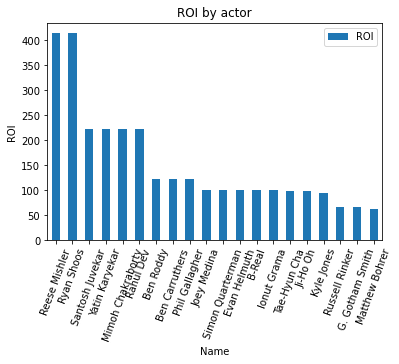

In [701]:
get_name_bar('actor')
plt.savefig('ROI by actor',bbox_inches='tight')

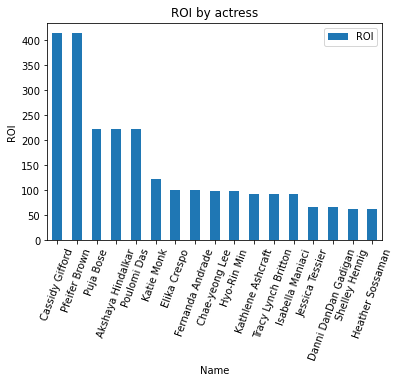

In [702]:
get_name_bar('actress')
plt.savefig('ROI by actress',bbox_inches='tight')

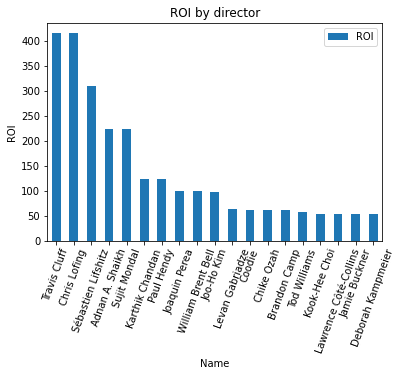

In [700]:
get_name_bar('director')
plt.savefig('ROI by director',bbox_inches='tight')

These show *top 20* **actors, directors, actresses** from above graphs. However this result is strongly *correlated* the specific **films** they are in. As top 1 and top 2 in each category, Reese Mishler, Cassiidy Gifford, Travis Cluff, Chris Lofing, Pfeifer Brown, and Ryan Shoos all are part of in *same* film. 

I recommend pick top 10 personas from each category, since these persons have significant higher ROI than rest of person.

### Genre

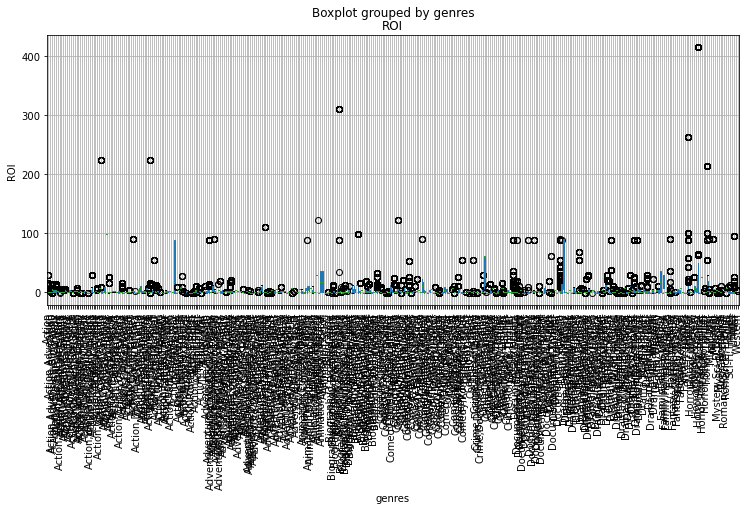

In [682]:
df_final.boxplot(by='genres',column='ROI',rot=90,figsize=(12,5))
plt.ylabel('ROI');
plt.savefig('ROI by genres')

**Genres** can be Drama, Documentary, Comedy, Horror, Family, Mystery, Adventure, Animation, Crime, Fatasy, War, Sci-Fi, News.........

There are so many!

I filtered that has top 10 records amount to compare **genres** that only has signifiant records size. 

In [673]:
# get geners that has top 10 records amount. 
df_final_genre_aftergroupby_top10 = df_final.groupby('genres').count()['id'].nlargest(10)

In [674]:
df_final_genre_aftergroupby_top10

genres
Adventure,Animation,Comedy    26779
Drama                         20713
Action,Adventure,Sci-Fi       20497
Comedy,Drama,Romance          14417
Comedy,Drama                  14351
Comedy                        13966
Action,Adventure,Fantasy      13924
Drama,Romance                 13209
Action,Crime,Drama            10648
Comedy,Romance                10230
Name: id, dtype: int64

In [675]:
# prepare final table to draw plot. Here only choose records whose genre are in top 10 genres that have most records.
df_final_genre_aftergroupby_top10_1 = df_final[df_final.genres.isin(df_final_genre_aftergroupby_top10.index)]

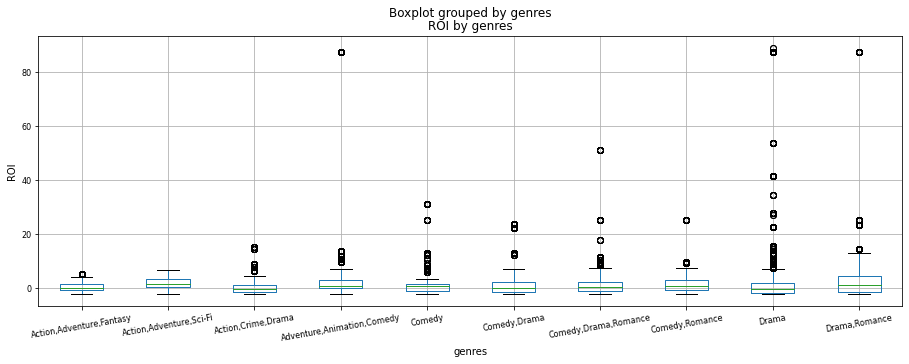

In [687]:
df_final_genre_aftergroupby_top10_1.boxplot(by='genres',column='ROI',rot=10,figsize=(15,5),fontsize=8)
plt.title('ROI by genres')
plt.ylabel('ROI');
plt.savefig('ROI by genres_top_10')

1. *'Adventure, Animation, Comedy', 'Action, Adventrue, Sci-Fi','Action, Adventure, Fantasy'* are there **genres** that generates *most* **ROI** comparing to other **genres** or genres conbinations. 

2. However overall each **genres** tends to have smilar **ROI** based on median comparison.

3. *Drama* has many *high* **ROI** films, however it could be the results of *high records volumns*. And majority of dramas films have *negative* **ROI**. 

4. *Comedy* and *Documentary* have many films that has *high* **ROI**. 

I would *recommend* setting genre as adventure and action or comedy, since films yeild high **ROI** are in these genre or commbination of these genres.  

## Results
This Analysis generates 3 recommendations:
1. Have **budget** set *between* 100K to 200K to have better chance to have high return on investment. 
2. Pick top 10 personas from each category such as Reese Mishler, Cassiidy Gifford, Travis Cluff, Chris Lofing, Pfeifer Brown, and Ryan Shoos, since these persons have significant higher **ROI** than rest of person.
3. Set genre as adventure and action or comedy, since films yeild high **ROI** are in these genre or commbination of these genres.

## More
There are some more related finds:
1. Another *measurement* here can be films **rating**, while it would provide perspective about how people like the film, ratings might not give as many insights about profit as **ROI** does.  

2. There are many **Generes** that doesn't have many records. However for those not-well-produced **generes** have some films that yield high ROI. This films can be investigated further and out of this project's scope.

3. The impact of persons on films'ROI are so correlated to films themselves. If there a group of person are in same film and that film has high **ROI** then those person all have high **ROI**. So alternatively, we can investigate **ROI** for each **title**, and then choose person from top 10 films that have highest ROI. 

4. Avatar has big box office, however it's budget is so high that makes it not high in ROI.
